# Project:Investigate a Dataset(TMDb Movie Data)

  The primary gaol of the project is to go through the dataset and establish some relationship and also uncover some trends insight that are 
  hiding behind the data

In [1]:
# import the necessary library you need for analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
sns.set_style('whitegrid')

# Data Wrangling

# General Properties of the Data

In [3]:
#Load and preview our dataset
df=pd.read_csv('C:\\Users\\SLAMAK\\Documents\\tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#check the number of rows and column of the dataset
df.shape

(10866, 21)

The data comprises of 10866 rows and 21 columns

In [5]:
#This shows preview of our columns
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [6]:
#This gives the statistical summary of our dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
#Check for missing data
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Some of our column have missing data 
The next step is data cleaning

There  are some missing across our dataset as seen above
some imdb_id are missing, cast which comprise of names of people who act in the movie


In [8]:
#fill in the missing values with 'Unknown'
df.fillna('unknown',inplace=True)

In [9]:
#Check to confirm no more missing data
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [10]:
#check the datatype of each columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

# Data Cleaning

# 1.Remove Duplicate Rows

In [11]:
#count the number of duplicate rows
sum(df.duplicated())

1

In [12]:
#Remove all the duplicate rows
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(10865, 21)

After removing duplicates ,the rows and columns are 10865 and 21 respectively

# 2.change format of Release Date into Datetime format

In [14]:
df['release_date']=pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [15]:
df['weekday']=df['release_date'].dt.day_name()
df['day']=df['release_date'].dt.day
df['month']=df['release_date'].dt.month_name()




# 3.Remove columns that is not going to be useful in the analysis

In [16]:
#Drop columns that you dont need
df.drop(['imdb_id','homepage','tagline','overview','budget_adj','revenue_adj'],axis=1,inplace=True)

In [17]:
df.shape

(10865, 18)

In [18]:
#shows the first 3 rows of the dataset
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,weekday,day,month
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Tuesday,9,June
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,Wednesday,13,May
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,Wednesday,18,March


# 4.Remove Inappropriate values

There are some rows that contains inappropriate values such rows contains 0 in both budget and revenue  columns

In [19]:
#This shows rows where budget and revenue is 0
filter=(df['budget']==0) &(df['revenue']==0)
df[filter].shape

(4701, 18)

In [20]:
#This shows the rows and columns where there are relevant values in the data
df[~filter].shape


(6164, 18)


THe dataset remains 10865 columns and 18 columns to be worked on



# EXPLORATORY DATA ANALYSIS

## Research Question 1: What are the top popular movies and  least popular movies?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

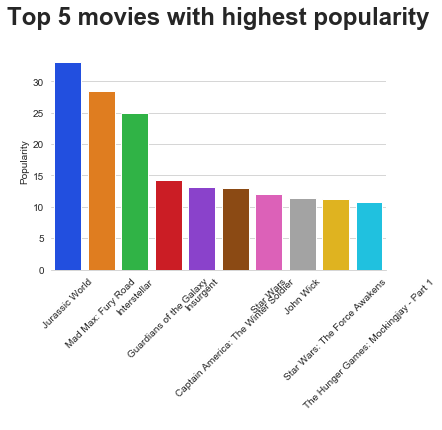

In [21]:

#make a dataframe plotting the top 10 popular movies
df_pop=df.sort_values(by='popularity',ascending=False)

#make a dataframe plotting the least 10 popular movies
df_pop2=df.sort_values(by='popularity',ascending=True)

#make a barchart plotting top 5 movies
sns.barplot(y='popularity',x='original_title',data=df_pop[0:10],palette='bright')
plt.title("Top 5 movies with highest popularity",fontsize=24,fontweight='bold',y=1.1)
sns.despine(left=True,bottom=False)
plt.ylabel("Popularity",fontsize=10)
plt.xlabel(" ")
plt.xticks(rotation=45)



In [22]:
df_pop2[['original_title','vote_average']][0:10]

,original_title,vote_average
6181,"North and South, Book I",6.0
9977,The Hospital,6.4
6080,G.B.F.,6.1
6551,Mon petit doigt m'a dit...,5.7
6961,Khosla Ka Ghosla!,6.8
7268,Born into Brothels,6.4
7256,SoupÃ§ons,7.5
3370,Fuera de carta,5.3
2874,Slashers,5.5
4948,The Invisible War,7.0


In [23]:
df_pop[['original_title','vote_average']][0:10]

,original_title,vote_average
0,Jurassic World,6.5
1,Mad Max: Fury Road,7.1
629,Interstellar,8.0
630,Guardians of the Galaxy,7.9
2,Insurgent,6.3
631,Captain America: The Winter Soldier,7.6
1329,Star Wars,7.9
632,John Wick,7.0
3,Star Wars: The Force Awakens,7.5
633,The Hunger Games: Mockingjay - Part 1,6.6


In [24]:
df['vote_average'].describe()

count    10865.000000
mean         5.975012
std          0.935138
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

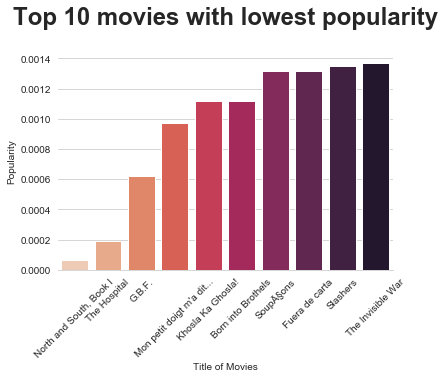

In [25]:
#make barplot showing movies with lowest popularities
sns.barplot(y='popularity',x='original_title',data=df_pop2[0:10],palette='rocket_r')
plt.title("Top 10 movies with lowest popularity",fontsize=24,fontweight='bold',y=1.1)
sns.despine(left=True,bottom=False)
plt.ylabel("Popularity",fontsize=10)
plt.xlabel("Title of Movies")
plt.xticks(rotation=45)


# Resarch Question 2: What are the movies with highest budget?

In [26]:
# Dataframe showing  10 movies with highest budget
df_bj=df.sort_values(by='budget',ascending=False)[0:10]



Text(0.5, 1.0, 'Top 10 movies with the highest budget')

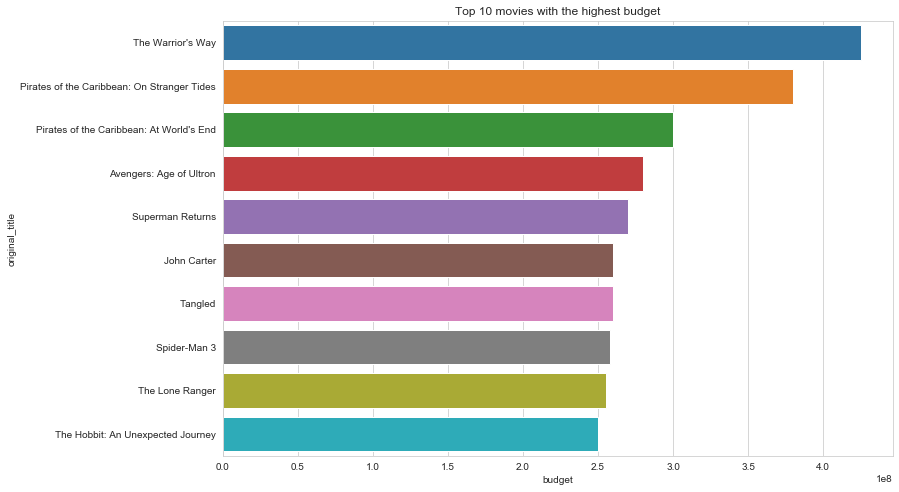

In [27]:
# This shows the top 20 movies with highest ranking
plt.figure(figsize=(12,8))
sns.barplot(x='budget',y='original_title',data=df_bj)
plt.title("Top 10 movies with the highest budget")



# According to the data given ,some entries contain where budget and originalm titles contain $0. I dont think it is financially possible,or maybe theres error during the data collation,hence the reason for unremoval is because the rows contains columns that can still be used for other analysis

In [28]:
df[df['budget']==0].shape


(5696, 18)

5169 movies  are  recorded in the dataset

In [29]:
df_low=df['budget']>0
df[df_low]

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,weekday,day,month
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Tuesday,9,June
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,Wednesday,13,May
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,Wednesday,18,March
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,Tuesday,15,December
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,Wednesday,1,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,5923,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,missionary|china|us navy|chinese|battle,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,2066-12-20,28,7.0,1966,Monday,20,December
10841,42701,0.264925,75000,0,The Shooting,Will Hutchins|Millie Perkins|Jack Nicholson|Wa...,Monte Hellman,horseback riding|revenge|pursuit|desert|whistling,82,Western,Proteus Films,2066-10-23,12,5.5,1966,Saturday,23,October
10848,2161,0.207257,5115000,12000000,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,Richard Fleischer,submarine|coma|claustrophobia|wound|laser,100,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,2066-08-24,42,6.7,1966,Tuesday,24,August
10855,13343,0.141026,700000,0,The Ghost & Mr. Chicken,Don Knotts|Joan Staley|Liam Redmond|Dick Sarge...,Alan Rafkin,newspaper|haunted house|organ|slapstick|trial,90,Comedy|Family|Mystery|Romance,Universal Pictures,2066-01-20,14,6.1,1966,Wednesday,20,January


In [30]:
df_low=df[df['budget']>0]
df_low

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,weekday,day,month
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Tuesday,9,June
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,Wednesday,13,May
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,Wednesday,18,March
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,Tuesday,15,December
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,Wednesday,1,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,5923,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,missionary|china|us navy|chinese|battle,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,2066-12-20,28,7.0,1966,Monday,20,December
10841,42701,0.264925,75000,0,The Shooting,Will Hutchins|Millie Perkins|Jack Nicholson|Wa...,Monte Hellman,horseback riding|revenge|pursuit|desert|whistling,82,Western,Proteus Films,2066-10-23,12,5.5,1966,Saturday,23,October
10848,2161,0.207257,5115000,12000000,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,Richard Fleischer,submarine|coma|claustrophobia|wound|laser,100,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,2066-08-24,42,6.7,1966,Tuesday,24,August
10855,13343,0.141026,700000,0,The Ghost & Mr. Chicken,Don Knotts|Joan Staley|Liam Redmond|Dick Sarge...,Alan Rafkin,newspaper|haunted house|organ|slapstick|trial,90,Comedy|Family|Mystery|Romance,Universal Pictures,2066-01-20,14,6.1,1966,Wednesday,20,January


In [31]:
# Dataframe showing  10 movies with lowest budget
df_bj2=df_low.sort_values(by='budget',ascending=True)[0:10]

df_bj2[['original_title','budget']]

,original_title,budget
3581,"Love, Wedding, Marriage",1
3065,"Angus, Thongs and Perfect Snogging",1
1151,Fear Clinic,1
2618,Lost & Found,1
8944,Death Wish 2,2
10050,Tales from the Darkside: The Movie,3
3765,Death of a Superhero,3
2398,Boy,3
1313,Des Lendemains Qui Chantent,5
8235,Tales from the Hood,6


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

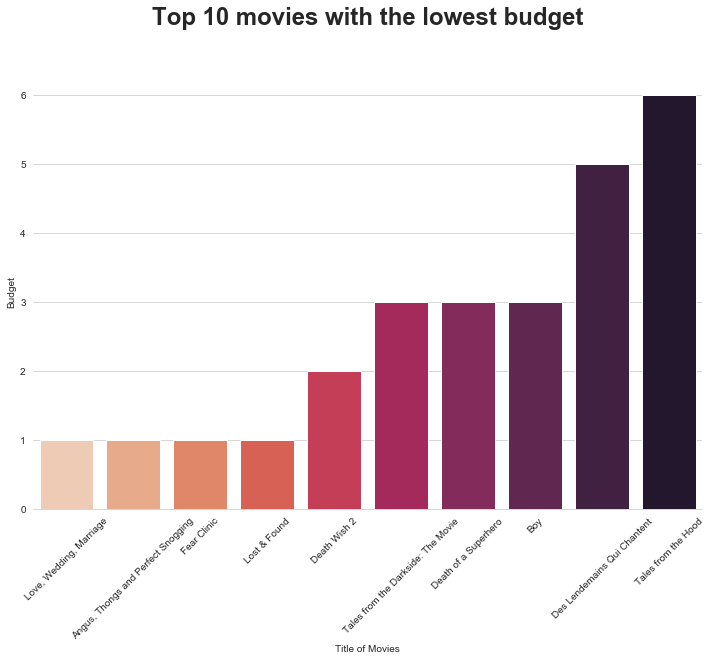

In [32]:
# This shows the top 20 movies with lowest budget
plt.figure(figsize=(12,8))


#make barplot showing movies with lowest popularities
sns.barplot(y='budget',x='original_title',data=df_bj2 ,palette='rocket_r')
plt.title("Top 10 movies with the lowest budget",fontsize=24,fontweight='bold',y=1.1)
sns.despine(left=True,bottom=False)
plt.ylabel("Budget",fontsize=10)
plt.xlabel("Title of Movies")
plt.xticks(rotation=45)



# Research Question3: Which director directs most movies?

In [33]:
#dataframe containing directors and number of movies produced
df_dir=df['director'].value_counts()[0:20].reset_index()

#renaming the columns
df_dir=df_dir.rename(columns={'index':'Directors','director':'No_movies_produced'})
df_dir.head()

,Directors,No_movies_produced
0,Woody Allen,45
1,unknown,44
2,Clint Eastwood,34
3,Martin Scorsese,29
4,Steven Spielberg,29


In [34]:
df_dir.shape

(20, 2)

(array([ 0., 10., 20., 30., 40., 50.]), <a list of 6 Text xticklabel objects>)

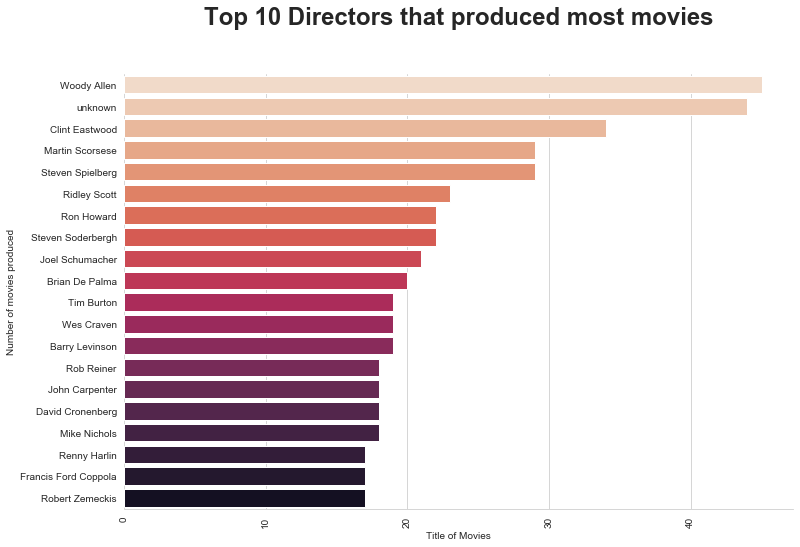

In [35]:
# This shows the top 20 movies with lowest budget
plt.figure(figsize=(12,8))


#make barplot showing movies with lowest popularities
sns.barplot(y='Directors',x='No_movies_produced',data=df_dir ,palette='rocket_r')
plt.title("Top 10 Directors that produced most movies",fontsize=24,fontweight='bold',y=1.1)
sns.despine(left=True,bottom=False)
plt.ylabel("Number of movies produced",fontsize=10)
plt.xlabel("Title of Movies")
plt.xticks(rotation=90)



# Research Question 4: What are the movies with the highest revenue?

In [36]:
#dataframe shoing top 10 movies wiyth highest revenue
df_rv=df.sort_values(by='revenue',ascending=False)[0:10]

#dataframe shoing top 10 movies wiyth lowest revenue
df_rv2=df.sort_values(by='revenue',ascending=True)[0:10]

Text(0.5, 0, '')

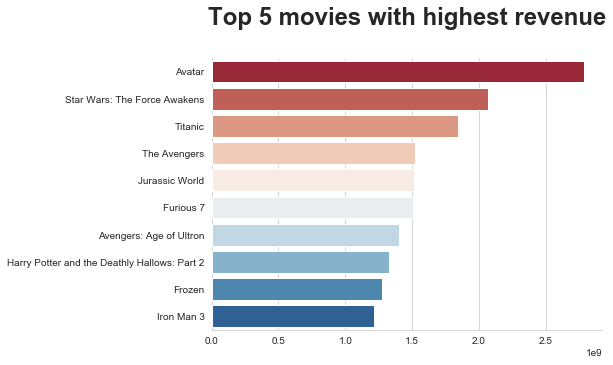

In [37]:
plt.figure(figsize=(7,5))
sns.barplot(x='revenue',y='original_title',data=df_rv,palette='RdBu')
plt.title("Top 5 movies with highest revenue",fontsize=24,fontweight='bold',y=1.1)
sns.despine(left=True,bottom=False)
plt.ylabel("",fontsize=10)
plt.xlabel("")



# Research Question 5:which year have the highest release of movies?

In [38]:
#dataframe showing years and number of movies released per year
df_id=df.groupby(['release_year']).count().reset_index()
df_id[['release_year','original_title']].head()

,release_year,original_title
0,1960,32
1,1961,31
2,1962,32
3,1963,34
4,1964,42


([<matplotlib.axis.XTick at 0x27d4870d748>,
 <a list of 19 Text xticklabel objects>)

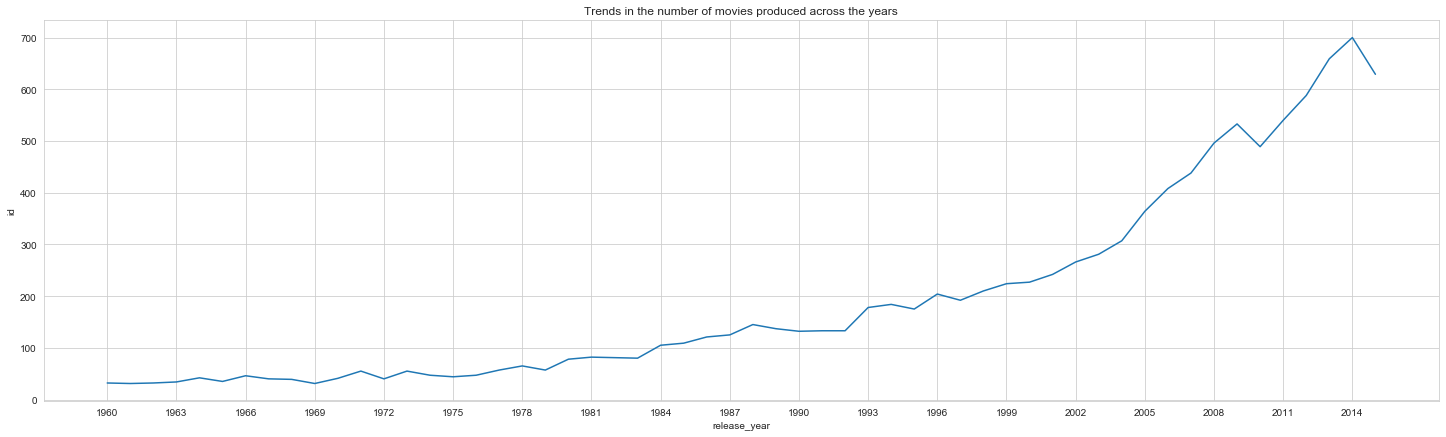

In [39]:
#size of chart
plt.figure(figsize=(25,7))

#lineplot showing years and number of movies
sns.lineplot(x='release_year',y='id',data=df_id)
plt.title("Trends in the number of movies produced across the years")
plt.xticks(np.arange(1960,2015,3))


# Research Question6: Which year have the highest number of production companies

([<matplotlib.axis.XTick at 0x27d487a3088>,
 <a list of 11 Text xticklabel objects>)

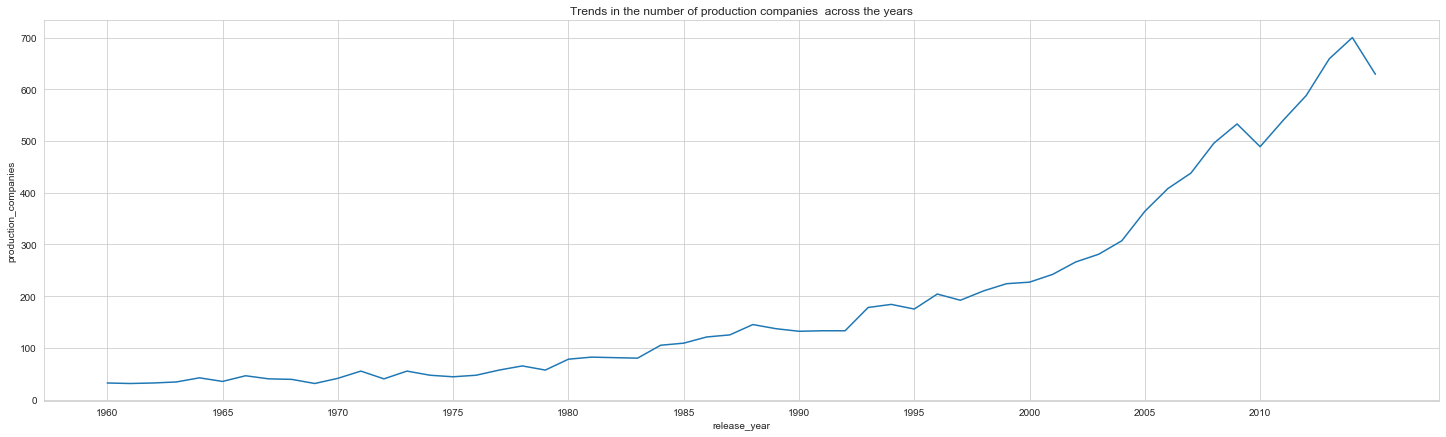

In [40]:
plt.figure(figsize=(25,7))
plt.title("Trends in the number of production companies  across the years")
sns.lineplot(x='release_year',y='production_companies',data=df_id[['release_year','production_companies']])
plt.xticks(np.arange(1960,2015,5))


# Research Question 6:Which year have the highest amount of revenue and budget

In [41]:
#dataframe showing release year and revenue generated each year
df_rev=df.groupby(['release_year']).sum().reset_index()
df_rev[['release_year','revenue']].head()

,release_year,revenue
0,1960,145005000
1,1961,337720188
2,1962,215579846
3,1963,187404989
4,1964,340981782


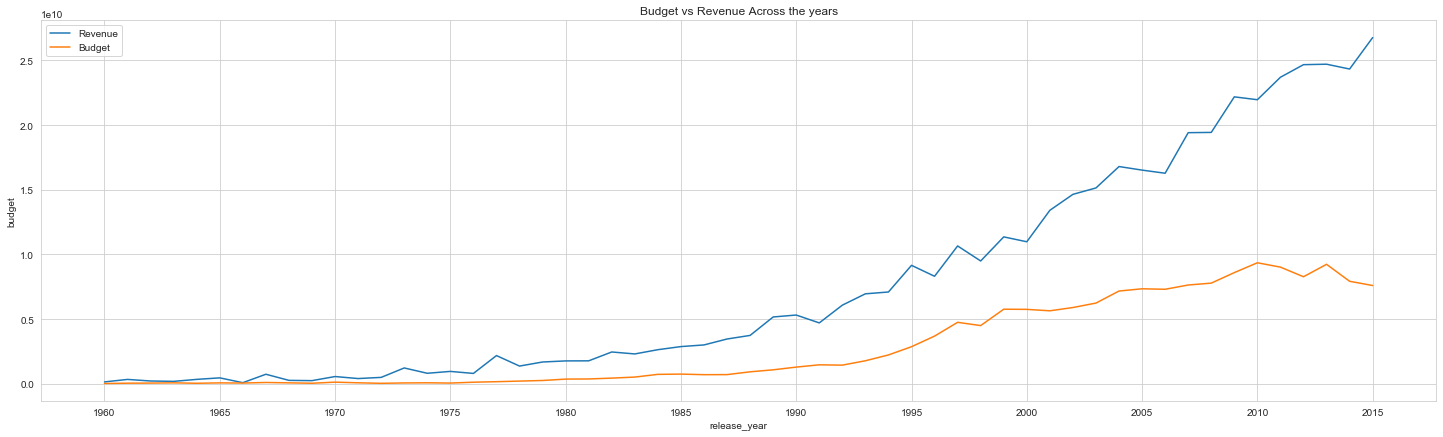

In [42]:
plt.figure(figsize=(25,7))
plt.title("Budget vs Revenue Across the years")
sns.lineplot(x='release_year',y='revenue',data=df_rev[['release_year','revenue']])
sns.lineplot(x='release_year',y='budget',data=df_rev[['release_year','budget']])
plt.xticks(np.arange(1960,2020,5))
plt.legend(['Revenue','Budget'])


# Research Question 7:which year have the amount of profit?

In [43]:

df['profit']=df['revenue']-df['budget']
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,weekday,day,month,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Tuesday,9,June,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,Wednesday,13,May,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,Wednesday,18,March,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,Tuesday,15,December,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,Wednesday,1,April,1316249360


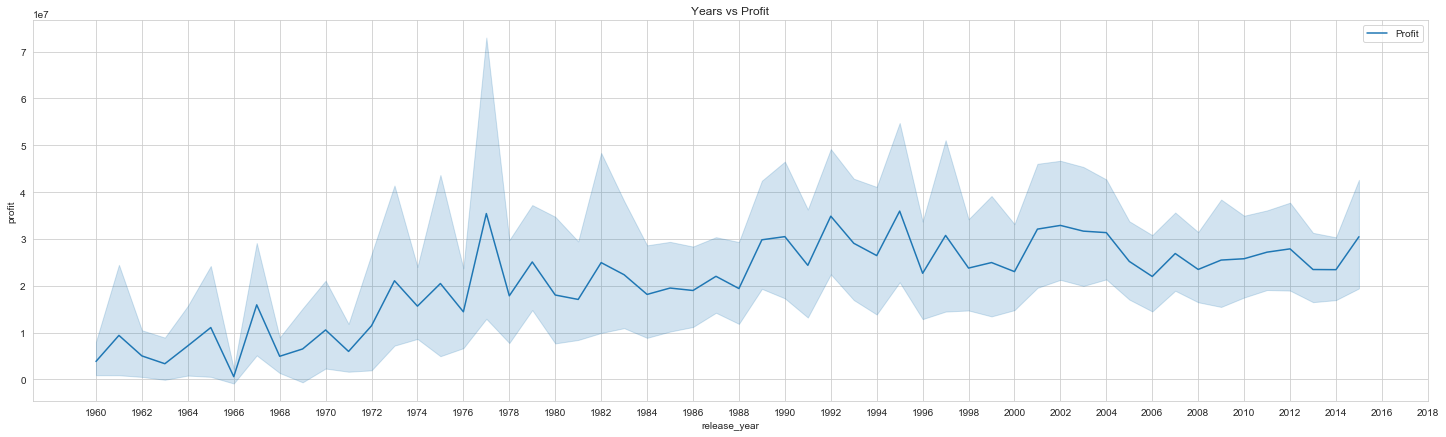

In [44]:
plt.figure(figsize=(25,7))
plt.title("Years vs Profit")
sns.lineplot(x='release_year',y='profit',data=df)

plt.xticks(np.arange(1960,2020,2))
plt.legend(['Profit'])


# Research Question 8:which movies have the highest and lowest amount of profit

In [45]:
#top 10 movies with highest profit
df_pro1=df.sort_values(by='profit',ascending=False).head(10)[['original_title','profit','genres','runtime','director','vote_average','release_year']]
df_pro1

,original_title,profit,genres,runtime,director,vote_average,release_year
1386,Avatar,2544505847,Action|Adventure|Fantasy|Science Fiction,162,James Cameron,7.1,2009
3,Star Wars: The Force Awakens,1868178225,Action|Adventure|Science Fiction|Fantasy,136,J.J. Abrams,7.5,2015
5231,Titanic,1645034188,Drama|Romance|Thriller,194,James Cameron,7.3,1997
0,Jurassic World,1363528810,Action|Adventure|Science Fiction|Thriller,124,Colin Trevorrow,6.5,2015
4,Furious 7,1316249360,Action|Crime|Thriller,137,James Wan,7.3,2015
4361,The Avengers,1299557910,Science Fiction|Action|Adventure,143,Joss Whedon,7.3,2012
3374,Harry Potter and the Deathly Hallows: Part 2,1202817822,Adventure|Family|Fantasy,130,David Yates,7.7,2011
14,Avengers: Age of Ultron,1125035767,Action|Adventure|Science Fiction,141,Joss Whedon,7.4,2015
5422,Frozen,1124219009,Animation|Adventure|Family,102,Chris Buck|Jennifer Lee,7.5,2013
8094,The Net,1084279658,Crime|Drama|Mystery|Thriller|Action,114,Irwin Winkler,5.6,1995


In [46]:
#top 10 movies with lowest profit
df_pro2=df.sort_values(by='profit',ascending=True).head(10)[['original_title','profit','genres','runtime','director','vote_average','release_year']]
df_pro2

,original_title,profit,genres,runtime,director,vote_average,release_year
2244,The Warrior's Way,-413912431,Adventure|Fantasy|Action|Western|Thriller,100,Sngmoo Lee,6.4,2010
5508,The Lone Ranger,-165710090,Action|Adventure|Western,149,Gore Verbinski,6.0,2013
2069,The Wolfman,-150000000,Horror|Thriller|Drama,102,Joe Johnston,5.4,2010
2214,The Pacific,-120000000,War|Drama|Action|Adventure|History,540,Jeremy Podeswa|Tim Van Patten|David Nutter|Gra...,7.8,2010
7031,The Alamo,-119180039,Western|History|War,137,John Lee Hancock,5.9,2004
3484,Mars Needs Moms,-111007242,Adventure|Animation|Family,88,Simon Wells,5.5,2011
2190,Double Wedding,-104002432,Comedy|Drama|Romance,87,Craig Pryce,5.3,2010
1696,Dragonball Evolution,-100000000,Action|Adventure|Fantasy|Science Fiction|Thriller,85,James Wong,3.1,2009
4970,Brother Bear,-99999750,Animation|Adventure|Family|Fantasy,85,Aaron Blaise|Robert Walker,6.8,2003
2435,The 13th Warrior,-98301101,Adventure|Fantasy|Action,102,John McTiernan,6.2,1999


Text(0.5, 1.0, 'Top 10 movies with highest profit')

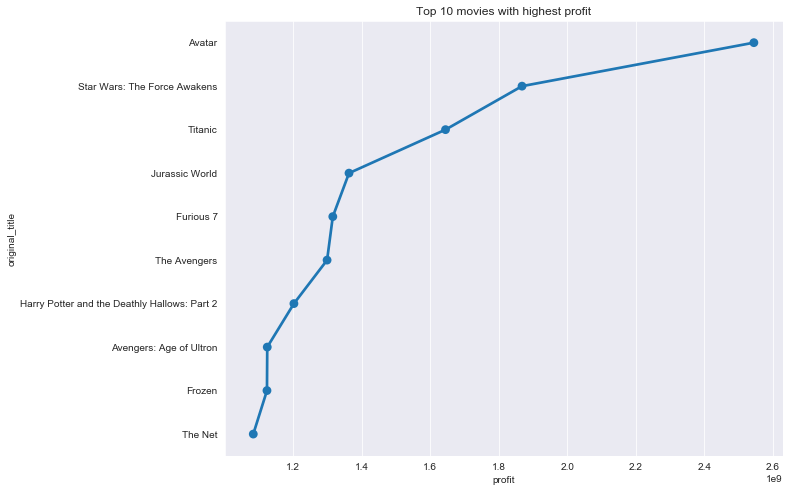

In [47]:
#pointplot showing top 10 movies with highest movies
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.pointplot(x='profit',y='original_title',data=df_pro1)
plt.title("Top 10 movies with highest profit")


Text(0.5, 1.0, 'Top 10 movies with lowest profit/loss')

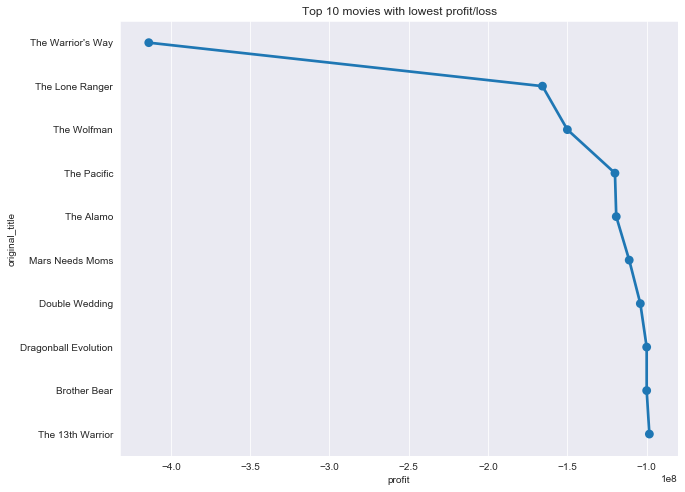

In [48]:
#pointplot showing top 10 movies with lowest profit or loss
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.pointplot(x='profit',y='original_title',data=df_pro2)
plt.title("Top 10 movies with lowest profit/loss")

# Research Question 9:Which movies have the highest runtime

In [49]:
df_run1=df.sort_values(by='runtime',ascending=False)

df_run1[['original_title','runtime']]

,original_title,runtime
3894,The Story of Film: An Odyssey,900
4041,Taken,877
2722,Band of Brothers,705
6176,Shoah,566
6181,"North and South, Book I",561
...,...,...
3329,"Grande, grosso e Verdone",0
4138,A Time for Dancing,0
1241,Dance-Off,0
6383,The 12 Dogs of Christmas,0


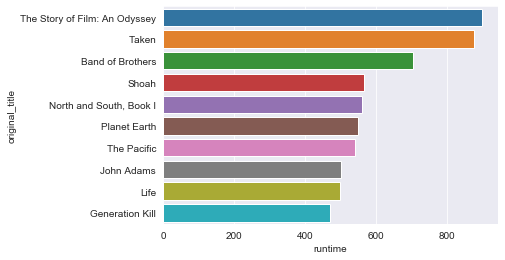

In [50]:
sns.barplot(x='runtime',y='original_title',data=df.sort_values(by='runtime',ascending=False)[0:10])


In [51]:
df_run1=df.sort_values(by='runtime',ascending=True)

df_run_lst=df_run1[df_run1['runtime']==0]
df_run_lst.shape

(31, 19)

Some of the length of movies was recorded as 0 which may be an error from the data gathering or any other reason.31 movies are recorded as 0 length in the dataset

In [52]:
df_run_valid=df_run1[df_run1['runtime']>0]
df_run_valid.shape

(10834, 19)

10834 have valid runtime

In [53]:
#This shows least runtimes as recorded in the dataset
df_run_valid.sort_values(by='runtime',ascending=True)[0:10][['original_title','runtime','genres','vote_average']]

,original_title,runtime,genres,vote_average
10754,Bambi Meets Godzilla,2,Animation|Comedy,5.6
4890,Cousin Ben Troop Screening,2,unknown,7.0
4883,Fresh Guacamole,2,Animation,7.9
7905,The Adventures of AndrÃ© and Wally B.,2,Animation,5.3
10550,Luxo Jr.,2,Animation|Family,7.3
3350,The Black Hole,3,Comedy|Crime,7.1
2232,Scrat's Continental Crack-Up,3,Animation,7.1
6930,Kiwi!,3,Animation|Action,6.7
2830,Shrek in the Swamp Karaoke Dance Party,3,Animation|Comedy|Music,5.4
1112,Batman: Strange Days,3,Action|Animation,7.6


# Research Question 10:Which movies have the highest and lowest vote average/ratings?

In [54]:
#dataframe containing top 10 movies with lowest vote average/ratings
df_vote_average1=df.sort_values(by='vote_average',ascending=False)[['original_title','profit','genres','runtime','director','vote_average','release_year']]

#dataframe containing top 10 movies with lowest vote average/ratings
df_vote_average2=df.sort_values(by='vote_average',ascending=True)[['original_title','profit','genres','runtime','director','vote_average','release_year']]


Text(0.5, 0, 'Ratings')

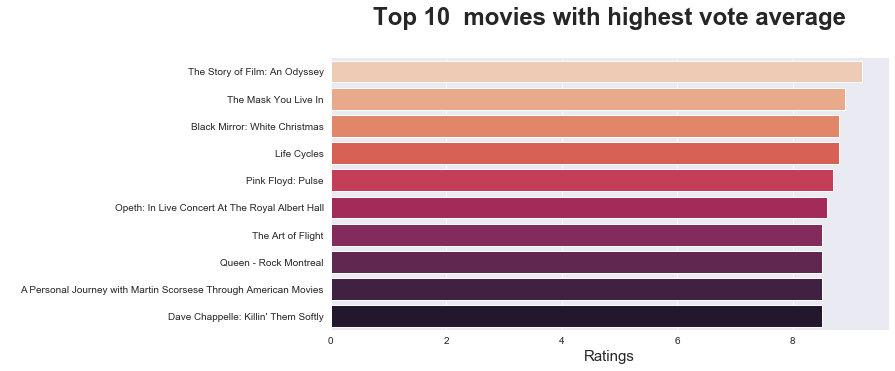

In [55]:


plt.figure(figsize=(10,5))

#barchart showing movies with highest ratings
sns.barplot(x='vote_average',y='original_title',data=df_vote_average1[0:10],palette='rocket_r')
plt.title("Top 10  movies with highest vote average",fontsize=24,fontweight='bold',y=1.1)
sns.despine(left=True,bottom=False)
plt.ylabel(" ")
plt.xlabel("Ratings",fontsize=15)







Text(0.5, 0, 'Ratings')

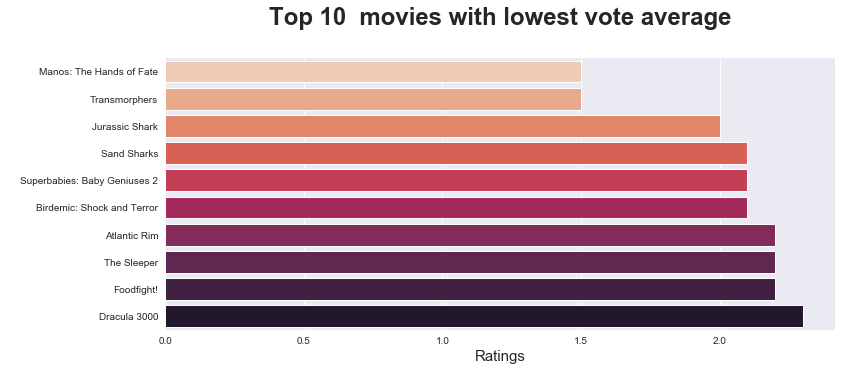

In [56]:


plt.figure(figsize=(12,5))

#barchart showing movies with lowest ratings
sns.barplot(x='vote_average',y='original_title',data=df_vote_average2[0:10],palette='rocket_r')
plt.title("Top 10  movies with lowest vote average",fontsize=24,fontweight='bold',y=1.1)
sns.despine(left=True,bottom=False)
plt.ylabel(" ")
plt.xlabel("Ratings",fontsize=15)







# Research Question 11:What is the average runtime over the years?

In [57]:
#average runtime of movies across the years 
df_pop_run=df.groupby(['release_year']).mean()[['runtime']]
df_pop_run[['runtime']].reset_index(inplace=True)
df_pop_run.head()

,runtime
release_year,
1960,110.656250
1961,119.419355
1962,124.343750
1963,111.323529
1964,109.214286


([<matplotlib.axis.XTick at 0x27d499b7548>,
 <a list of 28 Text xticklabel objects>)

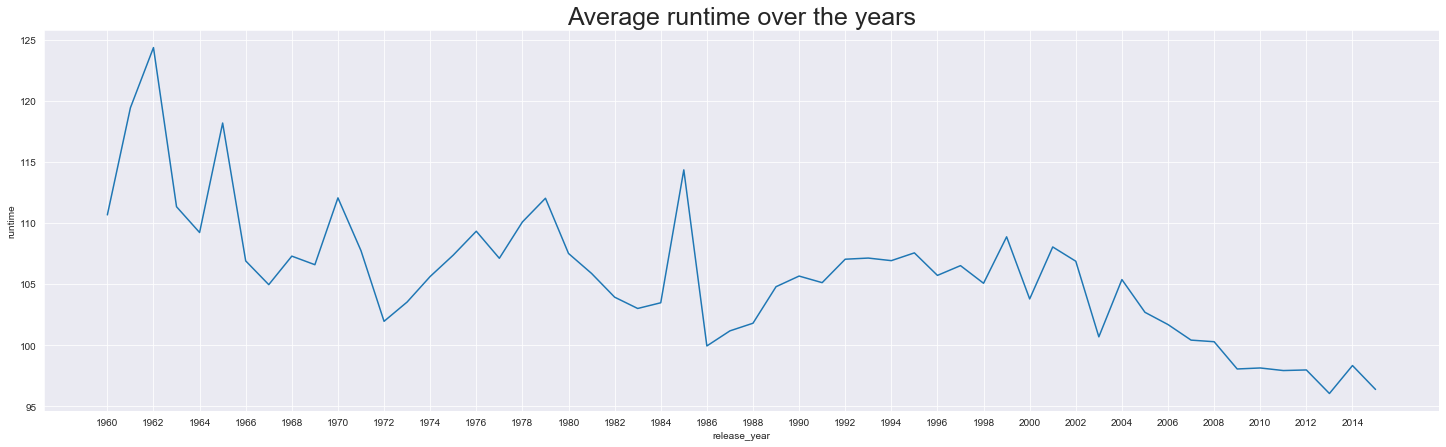

In [58]:

plt.figure(figsize=(25,7))
sns.lineplot(x=df_pop_run.index,y='runtime',data=df_pop_run)
plt.title("Average runtime over the years", fontsize=25)
plt.xticks(np.arange(1960,2015,2))

# Research Question 12:What is the average popularity over the years?

In [59]:
#datafrme showing average popularity of movies across the years 
df_pop_popl=df.groupby(['release_year']).sum()[['popularity']]
df_pop_popl[['popularity']].reset_index(inplace=True)
df_pop_popl.head()

,popularity
release_year,
1960,14.685834
1961,13.107641
1962,14.553069
1963,17.092019
1964,17.321989


([<matplotlib.axis.XTick at 0x27d4907f9c8>,
 <a list of 28 Text xticklabel objects>)

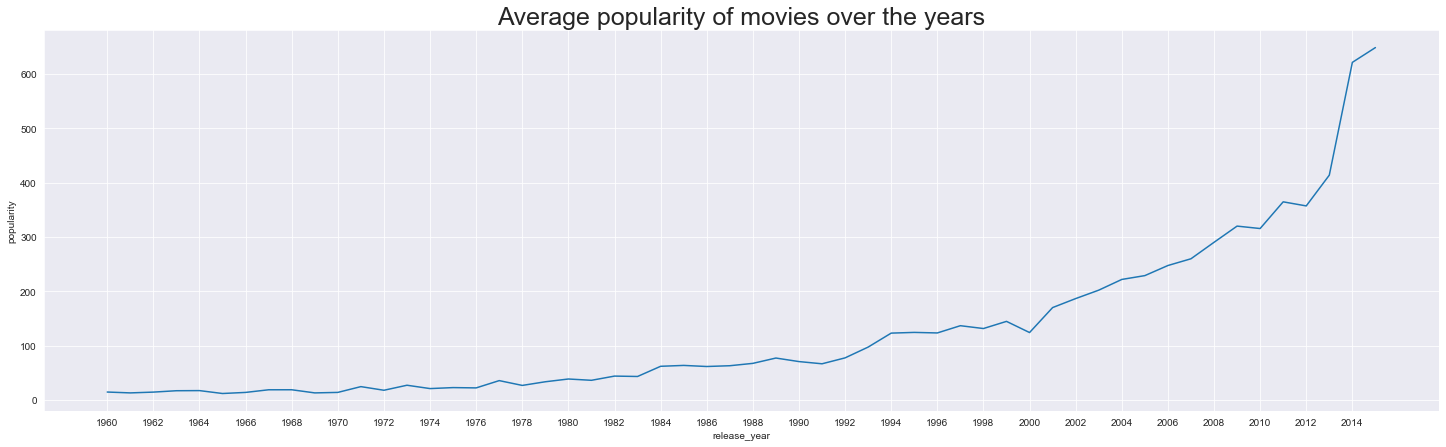

In [60]:
plt.figure(figsize=(25,7))

#lineplot showing average popularity of movies over the years
sns.lineplot(x=df_pop_run.index,y='popularity',data=df_pop_popl)
plt.title("Average popularity of movies over the years",fontsize=25)
plt.xticks(np.arange(1960,2015,2))

# Research Question 13:Which lengthy movies is most liked by audience according to their popularity?

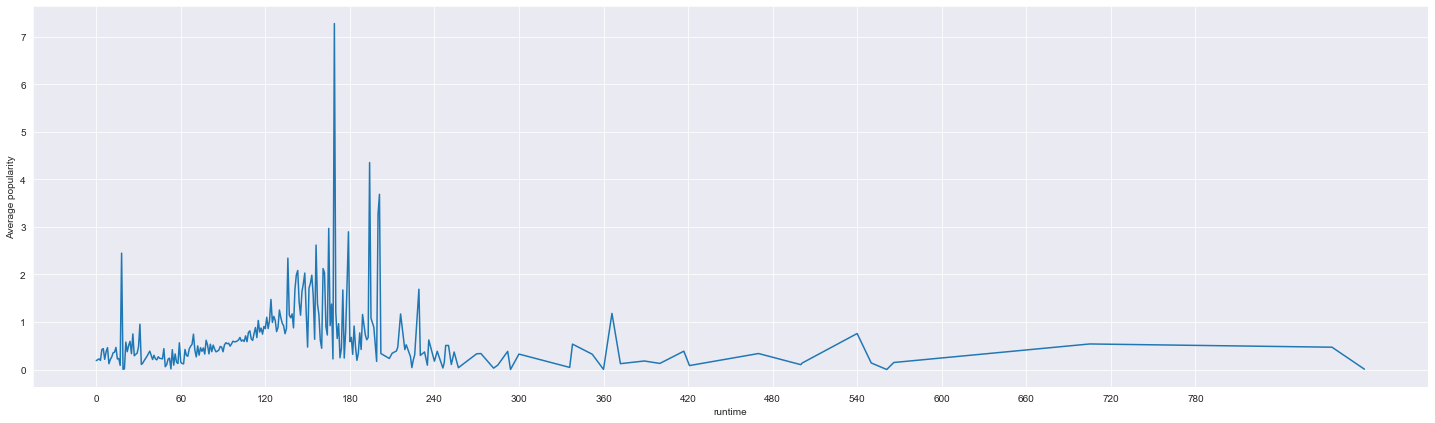

In [61]:
#groupby runtime and popularity
plt.figure(figsize=(25,7))
df.groupby(['runtime'])['popularity'].mean().plot()
plt.xticks(np.arange(0,800,60))

plt.ylabel("Average popularity")
sns.set_style("white")

# Research Question 14:Which month have the highest production of movies?

Text(0.5, 1.0, 'Months showing the highest numbers of movies it is produced in')

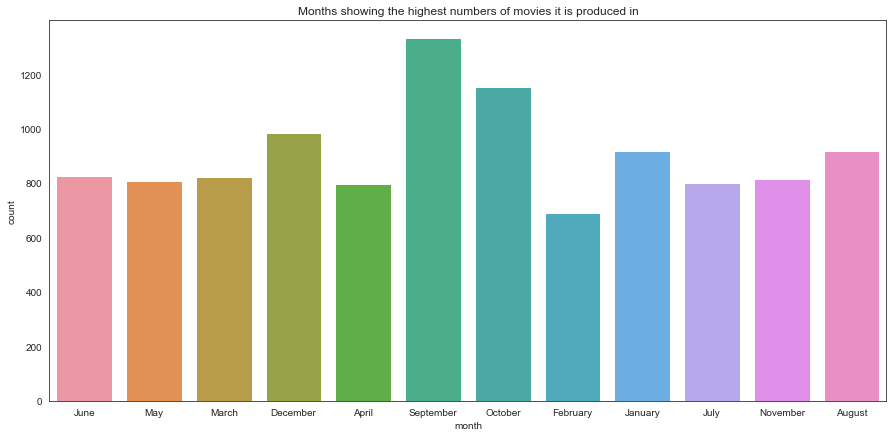

In [62]:
plt.figure(figsize=(15,7))
sns.countplot(df['month'])
plt.title("Months showing the highest numbers of movies it is produced in")


# Research Question 15: which month have the highest amount of revenue it is raised in?

In [63]:
df.groupby(['month']).mean()[['revenue']]

,revenue
month,
April,3.311576e+07
August,2.775356e+07
December,5.909834e+07
February,2.864513e+07
January,1.411151e+07
July,5.679878e+07
June,7.455935e+07
March,3.819337e+07
May,6.236695e+07


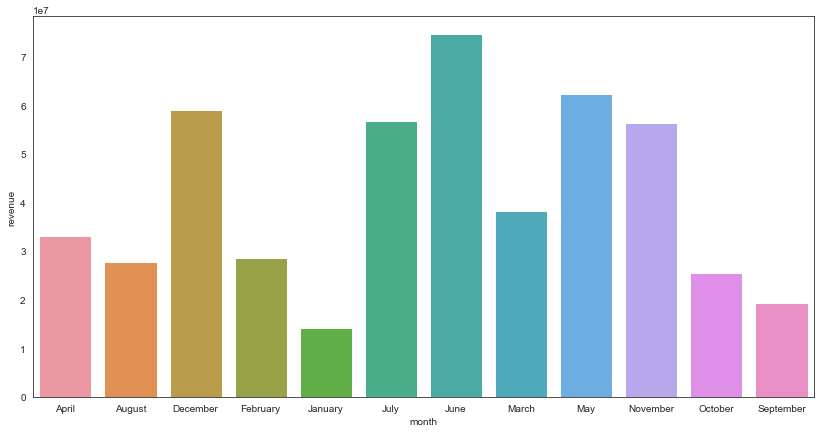

In [64]:
plt.figure(figsize=(14,7))
sns.barplot(x=df.groupby(['month']).mean()[['revenue']].index,y='revenue',data=df.groupby(['month']).mean()[['revenue']])

# Research Question 16:Which genre Has the highest release of movies

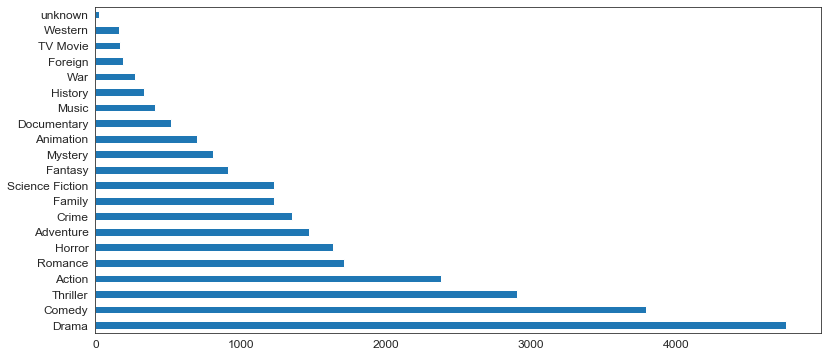

In [65]:
def count_genre(i):
    
    data_plot = df[i].str.cat(sep='|')
    data = pd.Series(data_plot.split('|'))
    
    info = data.value_counts(ascending=False)
    return info

total_genre_movies = count_genre('genres')
total_genre_movies.plot(kind='barh',figsize=(13,6), fontsize=12)

# Research Question 17:Which keywords are the most popular keywords used?

Text(0.5, 1.0, 'Most popular keywords used')

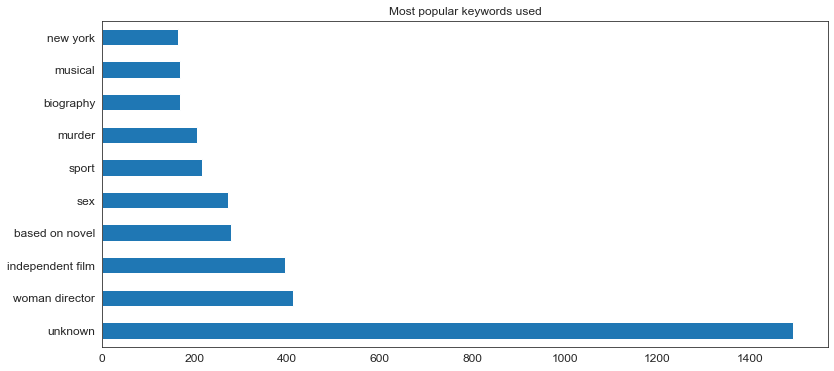

In [66]:
def count_keywords(i):
    
    data_plot = df[i].str.cat(sep='|')
    data = pd.Series(data_plot.split('|'))
    
    info = data.value_counts(ascending=False)
    return info

total_keywords = count_keywords('keywords')
total_keywords[0:10].plot(kind='barh',figsize=(13,6), fontsize=12)
plt.title("Most popular keywords used")

# Research Question 18:Which director produced highest number of movies?

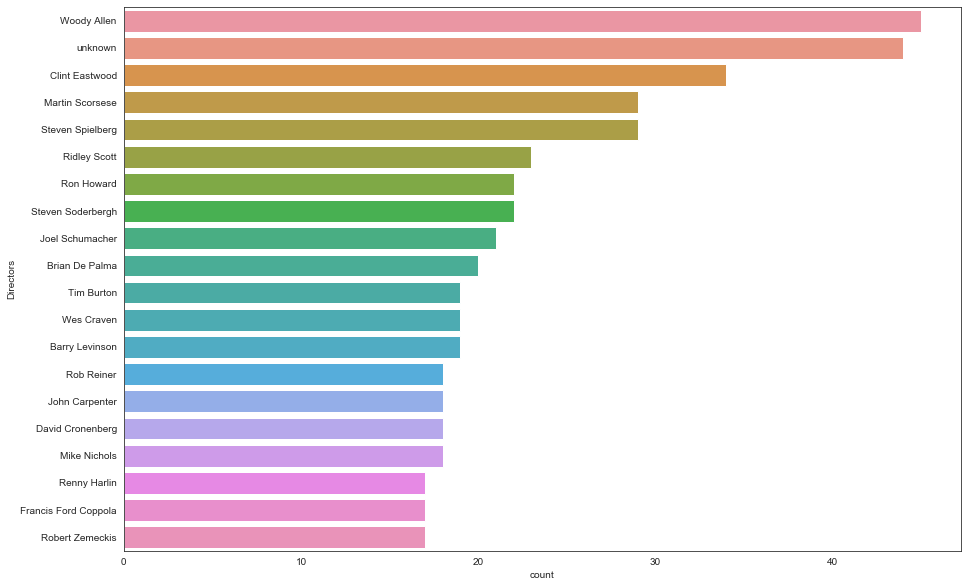

In [67]:
df_dir=df['director'].value_counts()[0:20].reset_index()
df_dir=df_dir.rename(columns={'index':'Directors','director':'count'})
df_dir.head()
plt.figure(figsize=(15,10))
sns.barplot(x='count',y='Directors',data=df_dir)

In [68]:
#producion companies and highest number of movie produced
df['production_companies'].value_counts()[0:10]

unknown                      1030
Paramount Pictures            156
Universal Pictures            133
Warner Bros.                   84
Walt Disney Pictures           76
Columbia Pictures              72
Metro-Goldwyn-Mayer (MGM)      72
New Line Cinema                61
Touchstone Pictures            51
20th Century Fox               50
Name: production_companies, dtype: int64

In [69]:
df_pr=df.groupby(['production_companies']).sum()[['profit']].sort_values(by='profit',ascending=False).reset_index()
df_pr.head()

,production_companies,profit
0,Paramount Pictures,5978839360
1,Walt Disney Pictures|Pixar Animation Studios,5791558520
2,Marvel Studios,4676908966
3,DreamWorks Animation,4629741096
4,Blue Sky Studios|Twentieth Century Fox Animation,3305820202


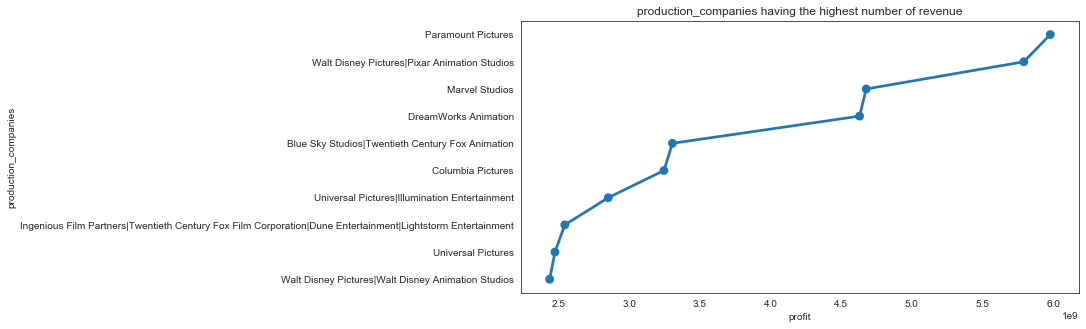

In [70]:
plt.figure(figsize=(10,5))
sns.pointplot(y='production_companies',x='profit',data=df_pr[0:10])
plt.title("production_companies having the highest number of revenue")

sns.set_style("whitegrid")

# Research Question 19:Which production company produced highest number of movies?

Text(0.5, 1.0, 'Production companies and number of movies produced')

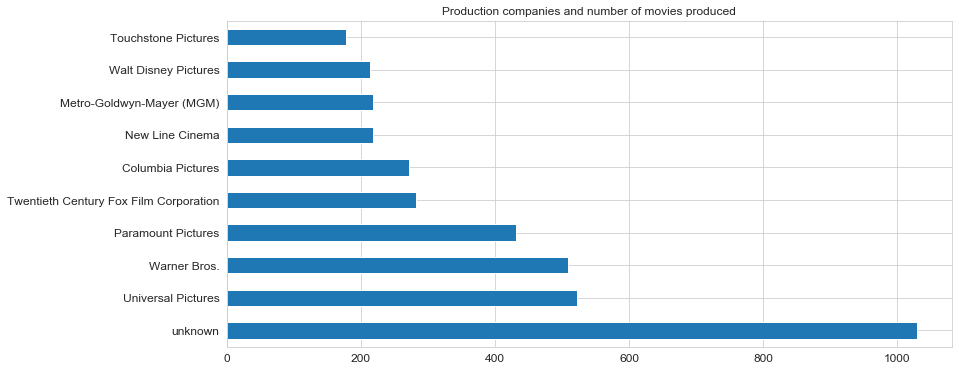

In [71]:
def prod_comp(i):
    
    data_plot = df[i].str.cat(sep='|')
    data = pd.Series(data_plot.split('|'))
    
    info = data.value_counts(ascending=False)
    return info

total_prod = count_genre('production_companies')
total_prod[0:10].plot(kind='barh',figsize=(13,6), fontsize=12)
plt.title("Production companies and number of movies produced")

# Research Question 20:Which actor is the most frequent?

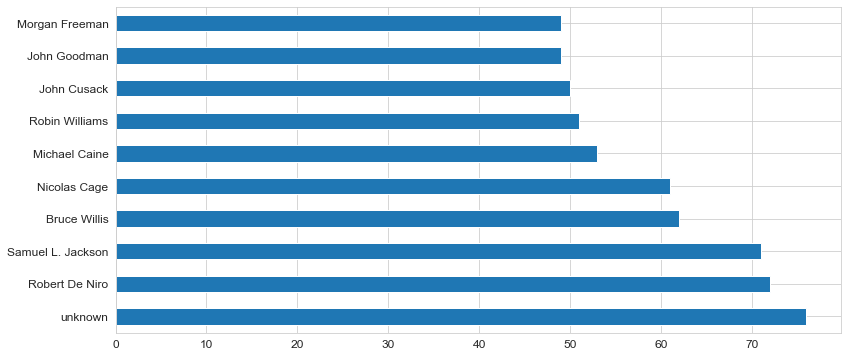

In [72]:
def prod_comp(i):
    
    data_plot = df[i].str.cat(sep='|')
    data = pd.Series(data_plot.split('|'))
    
    info = data.value_counts(ascending=False)
    return info

total_prod = count_genre('cast')
total_prod[0:10].plot(kind='barh',figsize=(13,6), fontsize=12)

In [73]:
#get dummies for the genre colums
dummy=df['genres'].str.get_dummies()
dummy.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,unknown
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [74]:
#concatenate the duumies gotten to the previous dataframe df
df7=pd.concat([df,dummy],axis=1).drop(['genres'],axis=1)
df7.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,production_companies,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,unknown
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Universal Studios|Amblin Entertainment|Legenda...,...,0,0,0,0,1,0,1,0,0,0
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Village Roadshow Pictures|Kennedy Miller Produ...,...,0,0,0,0,1,0,1,0,0,0
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Summit Entertainment|Mandeville Films|Red Wago...,...,0,0,0,0,1,0,1,0,0,0
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Lucasfilm|Truenorth Productions|Bad Robot,...,0,0,0,0,1,0,0,0,0,0
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Universal Pictures|Original Film|Media Rights ...,...,0,0,0,0,0,0,1,0,0,0


In [75]:
#shows the most genre that most produced most movies in descending order
top6=df7.iloc[:,19:-1].sum().sort_values(ascending=False).head(20).index.values
top6

array(['Drama', 'Comedy', 'Thriller', 'Romance', 'Horror', 'Adventure',
       'Crime', 'Family', 'Science Fiction', 'Fantasy', 'Mystery',
       'Animation', 'Documentary', 'Music', 'History', 'War', 'Foreign',
       'TV Movie', 'Western'], dtype=object)

In [76]:
#shows the new columns for the new dataframe df7
df7.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'keywords', 'runtime', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year', 'weekday',
       'day', 'month', 'profit', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western', 'unknown'],
      dtype='object')

In [77]:
#years vs each genre of movies
genre_groups = df7.groupby('release_year').sum().loc["1966":"2015",top6].reset_index()
genre_groups.tail()

,release_year,Drama,Comedy,Thriller,Romance,Horror,Adventure,Crime,Family,Science Fiction,Fantasy,Mystery,Animation,Documentary,Music,History,War,Foreign,TV Movie,Western
45,2011,214,172,146,75,78,62,48,72,56,46,38,46,49,17,8,9,14,10,3
46,2012,232,176,160,79,104,50,54,42,54,34,33,40,49,22,13,10,6,14,4
47,2013,253,175,175,65,102,67,71,48,61,39,38,42,62,30,14,7,0,10,3
48,2014,284,185,179,84,105,67,65,43,62,36,36,36,73,28,15,23,0,14,6
49,2015,260,162,171,57,125,69,51,44,86,33,42,39,57,33,15,9,0,20,6


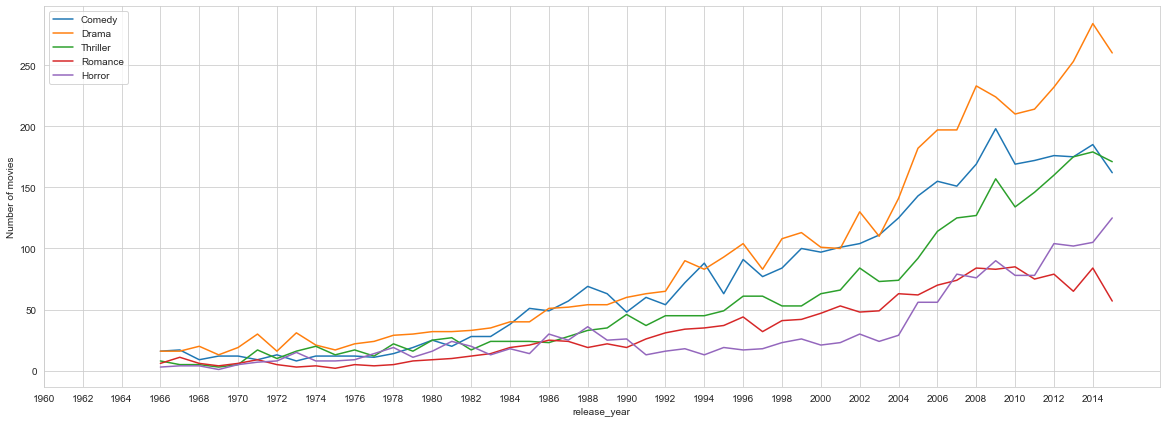

In [78]:
plt.figure(figsize=(20,7))
sns.lineplot(x='release_year',y='Comedy',data=genre_groups)
sns.lineplot(x='release_year',y='Drama',data=genre_groups)
sns.lineplot(x='release_year',y='Thriller',data=genre_groups)
sns.lineplot(x='release_year',y='Romance',data=genre_groups)
             
sns.lineplot(x='release_year',y='Horror',data=genre_groups)
plt.ylabel('Number of movies')




plt.xticks(np.arange(1960,2015,2))
plt.legend(['Comedy','Drama','Thriller','Romance','Horror'])

In [79]:
#function to get the lineplot of any genre
def genre_plot(genre):
    plt.figure(figsize=(14,7))
    plt.xticks(np.arange(1960,2015,2))
    plt.legend([genre])
    return  sns.lineplot(x='release_year',y=genre,data=genre_groups)
   

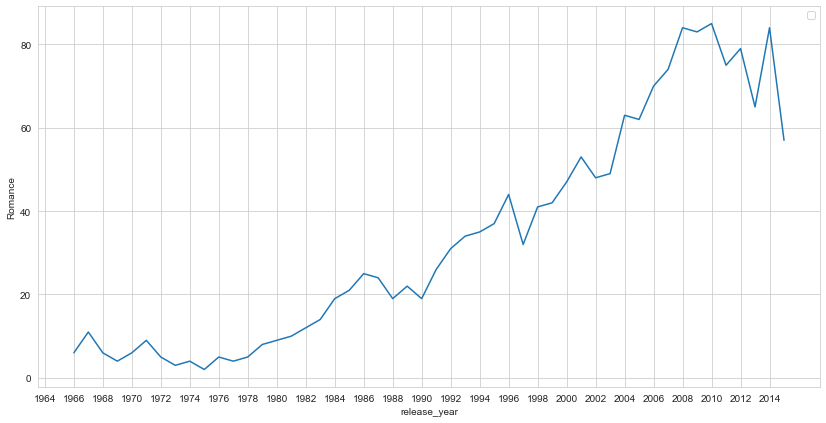

In [80]:
genre_plot('Romance')